## James Triveri - ISYE8803 - Final Exam - Problem \#2
---
#### Development Environment Details:  
Operating System: *Windows 10 (64-Bit)*    
Python Version  : *3.8.3 (64-Bit)* 

Implement your proposed algorithm using the data located in the the folder ratings.data from
MoviesLens Dataset. This dataset consists of ratings of 1682 movies by 943 users (on a 1-5 scale).
The test.csv file is generated by removing 10 of the item ratings from train.csv for each user and
assign them to test dataset. Plot both training and test errors in terms of MSE versus number of
iterations. Please use rank $d =20$, $\lambda=0.01$ and train it for 100 iterations.

In [1]:
import os
import os.path
import sys
import numpy as np
from numpy import linalg
from numpy.random import RandomState
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib.backends.backend_pdf import PdfPages

mpl.rcParams['axes.linewidth'] = 0.5
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(suppress=True, precision=5)
pd.options.mode.chained_assignment = None
np.set_printoptions(linewidth=1000)
pd.set_option("display.max_columns", 10000)
pd.set_option("display.width", 10000)

prng = RandomState(516)

# Set data_dir to top-level directory containing FinalExam datasets.
data_dir   = "G:\\Repos\\GT\\ISYE8803\\FinalExam"
train_name = "Q2_train.csv"
test_name  = "Q2_test.csv"
train_path = os.path.join(data_dir, train_name)
test_path  = os.path.join(data_dir, test_name)
dftrain    = pd.read_csv(train_path, header=None)
dftest     = pd.read_csv(test_path, header=None)



Minimum MSE on test data: 7.96580


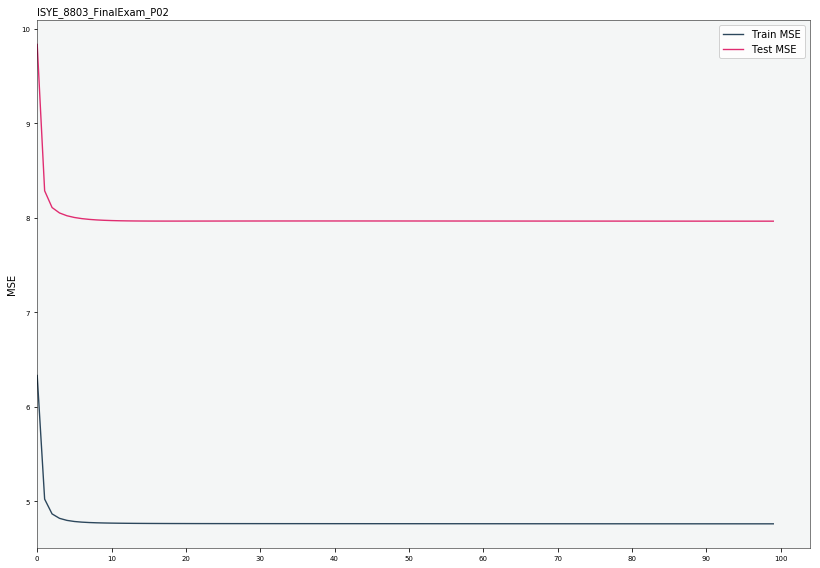

In [8]:
"""
P01.2 implementation.
"""
n_iter  = 100
lambda_ = .01
k       = 20 
Mtrain  = dftrain.values
Mtest   = dftest.values
V       = prng.random((Mtrain.shape[1], k))

# Bind reference to nonzero indicies for comparison to the low-rank 
# matrix approximation at each iteration.
nz_r_train, nz_c_train = np.where(Mtrain!=0)
nz_r_test, nz_c_test   = np.where(Mtest!=0)

# Determine MSE at each iteration. 
dfmse = pd.DataFrame({
    "iteration":range(n_iter), "train_mse":np.NaN, "test_mse":np.NaN,
    })

for ii in range(n_iter):
    
    # Use V to determine updated U.
    U = Mtrain @ V @ linalg.inv(V.T @ V + lambda_ * np.eye(k))   # (943, 20)

    # Use U to determine updated V.
    V = Mtrain.T @ U @ linalg.inv(U.T @ U + lambda_ * np.eye(k)) # (1682, 20)

    # Determine estimates of movie rankings using U and V.
    Mhat = U @ V.T                                               # (943, 1682)

    # Compute MSE using non-zero indicies in Mtrain and Mtest.
    vdiffs_train = Mtrain[nz_r_train, nz_c_train].ravel() - Mhat[nz_r_train, nz_c_train].ravel()
    vdiffs_test  = Mtest[nz_r_test, nz_c_test].ravel() - Mhat[nz_r_test, nz_c_test].ravel()
    
    # Update dfmse. 
    dfmse.at[ii,"train_mse"] = np.power(vdiffs_train, 2).sum() / nz_c_train.size
    dfmse.at[ii,"test_mse"] = np.power(vdiffs_test, 2).sum() / nz_c_test.size
    
    
print("\nMinimum MSE on test data: {:.5f}".format(
    dfmse[dfmse.test_mse==dfmse.test_mse.min()]["test_mse"].item())
     )


# Create visualization of train vs. test MSE.
fig, ax = plt.subplots(1, 1, figsize=(11.5, 8), tight_layout=True)
ax.set_facecolor("#f4f6f6")
ax.plot(
    dfmse["iteration"].values, dfmse["train_mse"].values, 
    label="Train MSE", color="#2c475c", linewidth=1.375
    )
ax.plot(
    dfmse["iteration"].values, dfmse["test_mse"].values, 
    label="Test MSE", color="#E02C70", linewidth=1.375
    )
ax.set_title(
    "ISYE_8803_FinalExam_P02", loc="left", fontsize=10,
    )
ax.set(
    xlabel="", ylabel="MSE", xlim=0,
    xticks=np.arange(0, 110, 10, dtype=np.int_,)
    )
ax.tick_params(
    axis="x", which="both", labelsize=7, top=False, bottom=True, 
    labeltop=False, labelbottom=True, direction="out",
    )
ax.tick_params(
    axis="y", which="both", labelsize=7, left=True, right=False, 
    labelleft=True, labelright=False, 
    )
ax.grid(False)
legend_ = ax.legend(
    loc="upper right", frameon=True, fontsize="medium", fancybox=True, 
    framealpha=.875
    )
frame_ = legend_.get_frame(); frame_.set_facecolor("#FFFFFF",)

# Write exhibit to file.
pdf_path = os.path.join(data_dir, "James_Triveri_ISYE8803_FinalExam_P02.pdf")
plt.savefig(pdf_path)  
